<h3> Importing all the required libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,max_error
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
def adjusted_r2_score(r_sq, n, k):
    n=data_1.shape[0]
    k=X_train.shape[1]-1
    return 1-((1-r_sq)*(n-1)/(n-k-1))

<h3> Reading the Dataset</h3>

In [2]:
data_1=pd.read_excel("AirQualityUCI.xlsx")

In [3]:
data_1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


<h3>Changing the Names of columns</h3>

In [4]:
data_1.rename(index=str, columns={"CO(GT)":"CO_Concentrate",
                              "PT08.S1(CO)": "Tin_Oxide",
                              "NMHC(GT)": "Non_Metanic_Hydrocarbons",
                              "C6H6(GT)": "Benzene_Concentration", 
                              "PT08.S2(NMHC)":"Titania_Concentration",
                              "NOx(GT)":"NOx",
                              "PT08.S3(NOx)":"Tungsten_Oxide_NOx",
                              "NO2(GT)":"NO2",
                              "PT08.S4(NO2)":"Tungsten_Oxide_NO2",
                              "PT08.S5(O3)":"Indium_Oxide",
                              "T":"Temperature",
                              "RH":"Relative_Humidity",
                              "AH":"Absolute_Humidity"}, inplace = True)

In [5]:
data_1

,Date,Time,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


<h3> Checking whether null values are present or not</h3>

In [6]:
data_1.isnull().sum()

Date                        0
Time                        0
CO_Concentrate              0
Tin_Oxide                   0
Non_Metanic_Hydrocarbons    0
Benzene_Concentration       0
Titania_Concentration       0
NOx                         0
Tungsten_Oxide_NOx          0
NO2                         0
Tungsten_Oxide_NO2          0
Indium_Oxide                0
Temperature                 0
Relative_Humidity           0
Absolute_Humidity           0
dtype: int64

<p> There are no null values in the airquality dataset</p>

<h3> Checking the outliers</h3>

In [7]:
data_1.describe()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


<p> We can clearly see that the minimum value of each feature is -200. We can replace negative values in the data with zero, mean, median etc</p>

<h3> Replacing the negative values</h3>

In [8]:
#Replacing all the values less than zero with zero
for v in data_1[data_1['CO_Concentrate']<0].index:
    data_1.loc[v,'CO_Concentrate']=0
for v in data_1[data_1['Tin_Oxide']<0].index:
    data_1.loc[v,'Tin_Oxide']=0
for v in data_1[data_1['Non_Metanic_Hydrocarbons']<0].index:
    data_1.loc[v,'Non_Metanic_Hydrocarbons']=0
for v in data_1[data_1['Benzene_Concentration']<0].index:
    data_1.loc[v,'Benzene_Concentration']=0
for v in data_1[data_1['Titania_Concentration']<0].index:
    data_1.loc[v,'Titania_Concentration']=0
for v in data_1[data_1['NOx']<0].index:
    data_1.loc[v,'NOx']=0
for v in data_1[data_1['Tungsten_Oxide_NOx']<0].index:
    data_1.loc[v,'Tungsten_Oxide_NOx']=0
for v in data_1[data_1['NO2']<0].index:
    data_1.loc[v,'NO2']=0
for v in data_1[data_1['Tungsten_Oxide_NO2']<0].index:
    data_1.loc[v,'Tungsten_Oxide_NO2']=0
for v in data_1[data_1['Indium_Oxide']<0].index:
    data_1.loc[v,'Indium_Oxide']=0
for v in data_1[data_1['Temperature']<0].index:
    data_1.loc[v,'Temperature']=0
for v in data_1[data_1['Relative_Humidity']<0].index:
    data_1.loc[v,'Relative_Humidity']=0
for v in data_1[data_1['Absolute_Humidity']<0].index:
    data_1.loc[v,'Absolute_Humidity']=0

In [9]:
data_1.describe()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,9.688596,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,7.559609,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [10]:
#We can also replace negative values with mean by using the following code
#for v in data_1[data_1['CO_Concentrate']<0].index:
#    data_1.loc[v,'CO_Concentrate']=data_1['CO_Concentrate'].mean()
#for v in data_1[data_1['Tin_Oxide']<0].index:
#    data_1.loc[v,'Tin_Oxide']=data_1['Tin_Oxide'].mean()
#for v in data_1[data_1['Non_Metanic_Hydrocarbons']<0].index:
#    data_1.loc[v,'Non_Metanic_Hydrocarbons']=data_1['Non_Metanic_Hydrocarbons'].mean()
#for v in data_1[data_1['Benzene_Concentration']<0].index:
#    data_1.loc[v,'Benzene_Concentration']=data_1['Benzene_Concentration'].mean()
#for v in data_1[data_1['Titania_Concentration']<0].index:
#    data_1.loc[v,'Titania_Concentration']=data_1['Titania_Concentration'].mean()
#for v in data_1[data_1['NOx']<0].index:
#    data_1.loc[v,'NOx']=data_1['NOx'].mean()
#for v in data_1[data_1['Tungsten_Oxide_NOx']<0].index:
#    data_1.loc[v,'Tungsten_Oxide_NOx']=data_1['Tungsten_Oxide_NOx'].mean()
#for v in data_1[data_1['NO2']<0].index:
#    data_1.loc[v,'NO2']=data_1['NO2'].mean()
#for v in data_1[data_1['Tungsten_Oxide_NO2']<0].index:
#   data_1.loc[v,'Tungsten_Oxide_NO2']=data_1['Tungsten_Oxide_NO2'].mean()
#for v in data_1[data_1['Indium_Oxide']<0].index:
#    data_1.loc[v,'Indium_Oxide']=data_1['Indium_Oxide'].mean()
#for v in data_1[data_1['Temperature']<0].index:
#    data_1.loc[v,'Temperature']=data_1['Temperature'].mean()
#for v in data_1[data_1['Relative_Humidity']<0].index:
#    data_1.loc[v,'Relative_Humidity']=data_1['Relative_Humidity'].mean()
#for v in data_1[data_1['Absolute_Humidity']<0].index:
#    data_1.loc[v,'Absolute_Humidity']=data_1['Absolute_Humidity'].mean()


In [11]:
data_1.describe()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,9.688596,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,7.559609,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [12]:
data_1.isnull().sum()

Date                        0
Time                        0
CO_Concentrate              0
Tin_Oxide                   0
Non_Metanic_Hydrocarbons    0
Benzene_Concentration       0
Titania_Concentration       0
NOx                         0
Tungsten_Oxide_NOx          0
NO2                         0
Tungsten_Oxide_NO2          0
Indium_Oxide                0
Temperature                 0
Relative_Humidity           0
Absolute_Humidity           0
dtype: int64

In [13]:
data_1['Date']=pd.to_datetime(data_1.Date, format='%d/%m/%Y')

In [14]:
data_1

,Date,Time,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [15]:
data_1['Month'] = data_1['Date'].dt.month
data_1.head()

,Date,Time,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity,Month
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3


<h3> Time vs NO2 plot </h3>

Text(0.5, 1.0, 'NO2 with respect to Time')

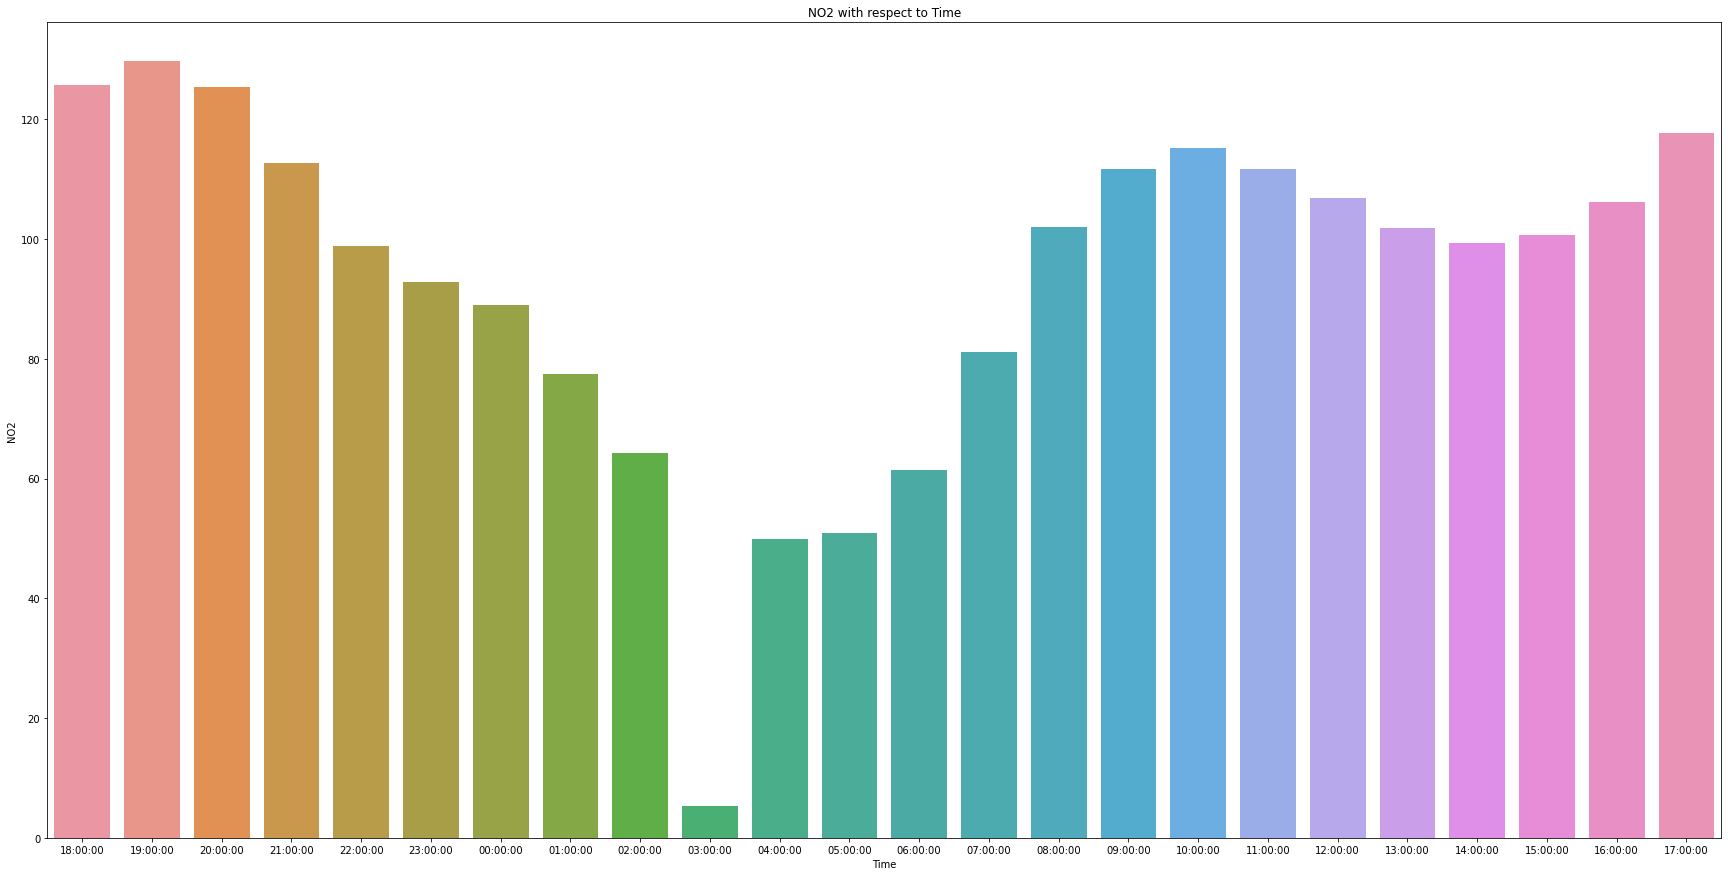

In [16]:
plt.figure(figsize=(30,15))
sns.barplot(x='Time',y='NO2',data=data_1, ci=False)
plt.xlabel('Time')
plt.ylabel('NO2')
plt.title("NO2 with respect to Time")

In [17]:
data_1=data_1.drop('Date',axis=1)
data_1=data_1.drop('Time',axis=1)
data_1=data_1.drop('Month',axis=1)

In [18]:
X=data_1.drop('NO2',axis=1)
y=data_1['NO2']

In [19]:
data_1.corr()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
CO_Concentrate,1.000000,0.442803,0.249731,0.670790,0.533061,0.811449,-0.513070,0.723154,0.282080,0.586753,-0.079253,-0.018418,-0.092964
Tin_Oxide,0.442803,1.000000,0.213250,0.786143,0.922093,0.356291,-0.075630,0.284508,0.823505,0.886880,0.300359,0.417492,0.403123
Non_Metanic_Hydrocarbons,0.249731,0.213250,1.000000,0.198346,0.170037,-0.003611,-0.033366,0.099541,0.196691,0.155224,-0.025205,-0.020121,-0.071580
Benzene_Concentration,0.670790,0.786143,0.198346,1.000000,0.926265,0.543665,-0.457762,0.402581,0.734014,0.862751,0.275852,0.074847,0.261013
Titania_Concentration,0.533061,0.922093,0.170037,0.926265,1.000000,0.419047,-0.240806,0.334108,0.855763,0.903060,0.400031,0.215377,0.393508
NOx,0.811449,0.356291,-0.003611,0.543665,0.419047,1.000000,-0.514602,0.795888,0.068429,0.553223,-0.268778,0.079334,-0.210622
Tungsten_Oxide_NOx,-0.513070,-0.075630,-0.033366,-0.457762,-0.240806,-0.514602,1.000000,-0.440202,-0.002102,-0.352407,0.092534,0.223613,0.068493
NO2,0.723154,0.284508,0.099541,0.402581,0.334108,0.795888,-0.440202,1.000000,0.010185,0.439057,-0.195749,-0.125245,-0.324221
Tungsten_Oxide_NO2,0.282080,0.823505,0.196691,0.734014,0.855763,0.068429,-0.002102,0.010185,1.000000,0.694715,0.641916,0.291896,0.719606
Indium_Oxide,0.586753,0.886880,0.155224,0.862751,0.903060,0.553223,-0.352407,0.439057,0.694715,1.000000,0.149302,0.318989,0.259548


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

<h3> Forward Feature Selection</h3>

LinearRegression()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


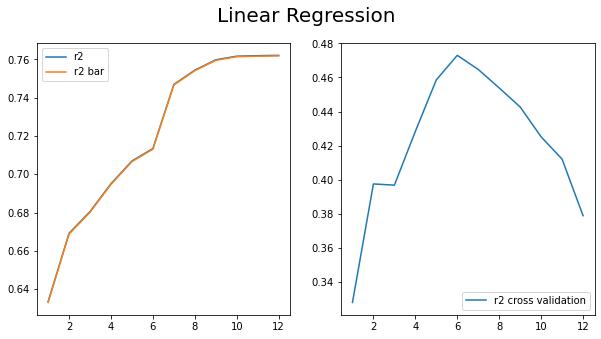

Lasso()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


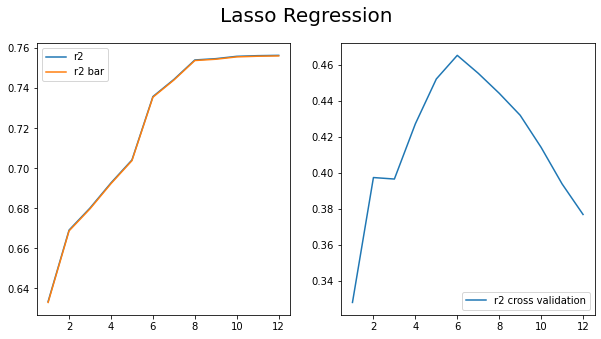

Ridge()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


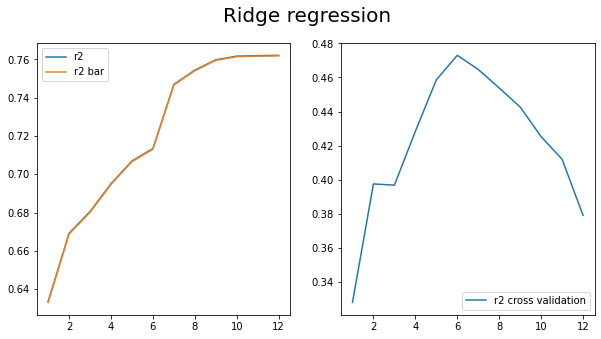

Quadratic()
Feature selected are: 
 ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


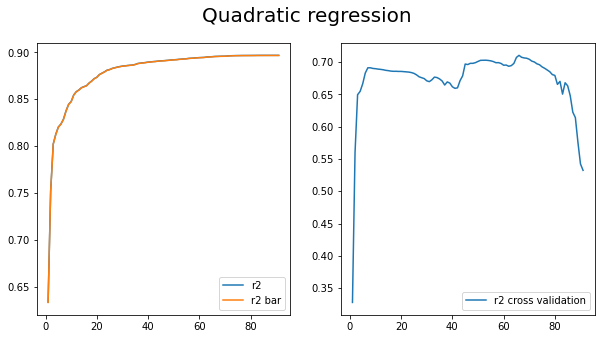

In [21]:
lreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
poly='Quadratic()'


regression_dict = {lreg:'Linear Regression', lasso:'Lasso Regression', ridge:'Ridge regression',
                  poly:'Quadratic regression'}

for i in regression_dict:
    print(i)
    if i=='Quadratic()':
        model=LinearRegression()
        poly_reg = PolynomialFeatures(degree=2)
        X_in = poly_reg.fit_transform(X)
        y_in = y
    else:
        model=i
        X_in = X
        y_in = y
       
       
    sfs1 = SFS(estimator=model, 
               k_features='best',
               forward=True, 
               floating=False, 
    #            verbose=2,
               scoring='r2',
               cv=0)
    sfs1 = sfs1.fit(X_in, y_in)
    print("Feature selected are: \n",sfs1.k_feature_names_)
    sfs1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T 
    k_features = [len(k) for k in sfs1['feature_idx']]
    r2_score_x = [k for k in sfs1['avg_score']]
    adj_r2_score=[adjusted_r2_score(r2_score_x[i], X.size, k_features[i]) for i in range(len(r2_score_x))]

    sfs_cv = SFS(estimator=model, 
               k_features='best',
               forward=True, 
               floating=False, 
               scoring='r2',
               cv=5)

    sfs_cv = sfs_cv.fit(X_in, y_in) 
    sfs_cv = pd.DataFrame.from_dict(sfs_cv.get_metric_dict()).T
    cv_score = [k for k in sfs_cv['avg_score']]
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle(regression_dict[i], fontsize=20)
    plt.subplot(121)
    plt.plot( k_features, r2_score_x,label="r2")
    plt.plot( k_features, adj_r2_score,label="r2 bar")
    plt.legend()
    plt.subplot(122)
    plt.plot( k_features, cv_score,label="r2 cross validation")
    plt.legend()
    plt.show()

<h3> Backward Feature Selection</h3>

LinearRegression()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


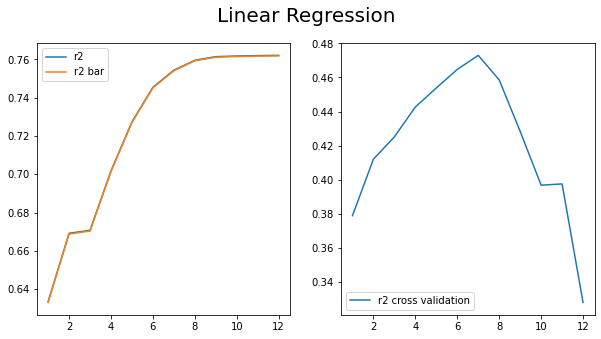

Lasso()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


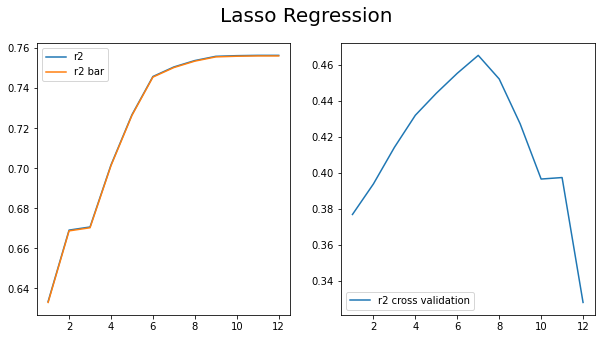

Ridge()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


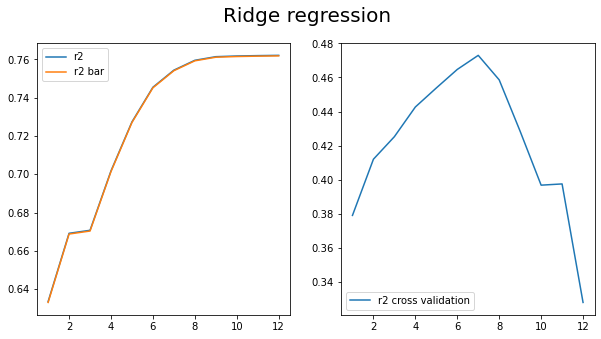

Quadratic()
Feature selected are: 
 ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


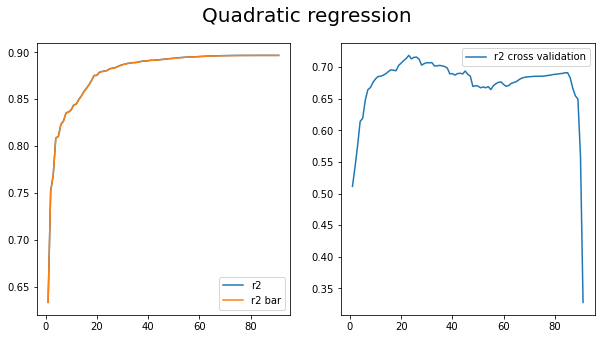

In [25]:
lreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
poly='Quadratic()'


regression_dict = {lreg:'Linear Regression', lasso:'Lasso Regression', ridge:'Ridge regression',
                  poly:'Quadratic regression'}

for i in regression_dict:
    print(i)
    if i=='Quadratic()':
        model=LinearRegression()
        poly_reg = PolynomialFeatures(degree=2)
        X_in = poly_reg.fit_transform(X)
        y_in = y
    else:
        model=i
        X_in = X
        y_in = y
       
       
    sfs1 = SFS(estimator=model, 
               k_features='best',
               forward=False, 
               floating=False, 
               scoring='r2',
               cv=0)
    sfs1 = sfs1.fit(X_in, y_in)
    print("Feature selected are: \n",sfs1.k_feature_names_)
    sfs1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T 
    k_features = [len(k) for k in sfs1['feature_idx']]
    r2_score_x = [k for k in sfs1['avg_score']]
    adj_r2_score=[adjusted_r2_score(r2_score_x[i], X.size, k_features[i]) for i in range(len(r2_score_x))]

    sfs_cv = SFS(estimator=model, 
               k_features='best',
               forward=True, 
               floating=False, 
               scoring='r2',
               cv=5)

    sfs_cv = sfs_cv.fit(X_in, y_in) 
    sfs_cv = pd.DataFrame.from_dict(sfs_cv.get_metric_dict()).T
    cv_score = [k for k in sfs_cv['avg_score']]
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle(regression_dict[i], fontsize=20)
    plt.subplot(121)
    plt.plot( k_features, r2_score_x,label="r2")
    plt.plot( k_features, adj_r2_score,label="r2 bar")
    plt.legend()
    plt.subplot(122)
    plt.plot( k_features, cv_score,label="r2 cross validation")
    plt.legend()
    plt.show()

<h3> Step-wise Feature Selection</h3>

LinearRegression()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


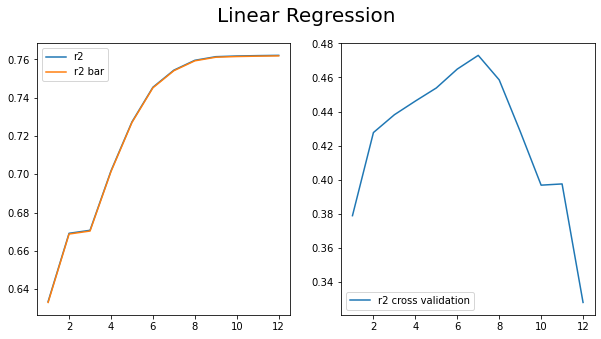

Lasso()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


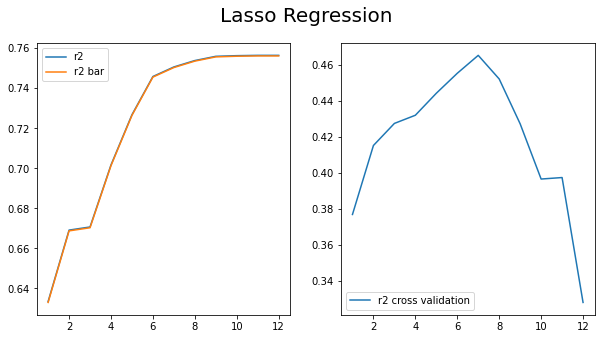

Ridge()
Feature selected are: 
 ('CO_Concentrate', 'Tin_Oxide', 'Non_Metanic_Hydrocarbons', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Tungsten_Oxide_NOx', 'Tungsten_Oxide_NO2', 'Indium_Oxide', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


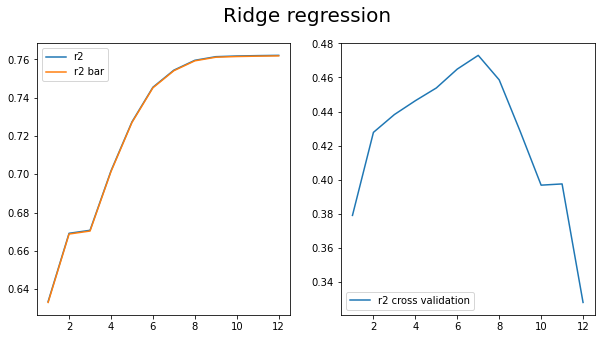

Quadratic()
Feature selected are: 
 ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
lreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
poly='Quadratic()'


regression_dict = {lreg:'Linear Regression', lasso:'Lasso Regression', ridge:'Ridge regression',
                  poly:'Quadratic regression'}

for i in regression_dict:
    print(i)
    if i=='Quadratic()':
        model=LinearRegression()
        poly_reg = PolynomialFeatures(degree=2)
        X_in = poly_reg.fit_transform(X)
        y_in = y
    else:
        model=i
        X_in = X
        y_in = y
       
       
    sfs1 = SFS(estimator=model, 
               k_features='best',
               forward=False, 
               floating=False, 
               scoring='r2',
               cv=0)
    sfs1 = sfs1.fit(X_in, y_in)
    print("Feature selected are: \n",sfs1.k_feature_names_)
    sfs1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T 
    k_features = [len(k) for k in sfs1['feature_idx']]
    r2_score_x = [k for k in sfs1['avg_score']]
    adj_r2_score=[adjusted_r2_score(r2_score_x[i], X.size, k_features[i]) for i in range(len(r2_score_x))]

    sfs_cv = SFS(estimator=model, 
               k_features='best',
               forward=True, 
               floating=True, 
               scoring='r2',
               cv=5)

    sfs_cv = sfs_cv.fit(X_in, y_in) 
    sfs_cv = pd.DataFrame.from_dict(sfs_cv.get_metric_dict()).T
    cv_score = [k for k in sfs_cv['avg_score']]
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle(regression_dict[i], fontsize=20)
    plt.subplot(121)
    plt.plot( k_features, r2_score_x,label="r2")
    plt.plot( k_features, adj_r2_score,label="r2 bar")
    plt.legend()
    plt.subplot(122)
    plt.plot( k_features, cv_score,label="r2 cross validation")
    plt.legend()
    plt.show()

<p>A lot of features are selected in quadratic regression so it is taking too much time to plot the graph</p>

<h3>Linear Regression</h3>

Linear Regression R2: 0.7643252004641696
Linear Regression: Adjusted R^2 score is 0.7640477876450263


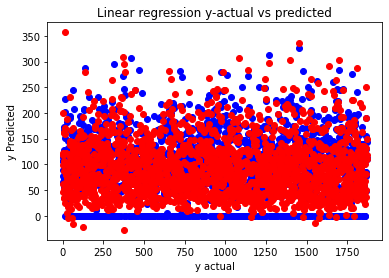

In [23]:
lr=LinearRegression()
lr.fit(X_train,y_train)
predict_lr=lr.predict(X_test)
x=r2_score(y_test,predict_lr)
print("Linear Regression R2:",x)
print("Linear Regression: Adjusted R^2 score is", adjusted_r2_score(x,X_train.shape[0], X_train.shape[1]-1))
plot = plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(predict_lr)), predict_lr, color='red')
plot.axes.set_xlabel('y actual')
plot.axes.set_ylabel('y Predicted')
plt.title('Linear regression y-actual vs predicted')
plt.show()

<h3>Ridge Regression</h3>

Best Alpha 0.9899999999999995
Ridge Regression R2: 0.7643334420269736
Ridge Regression: Adjusted R^2 score is 0.7640560389089743


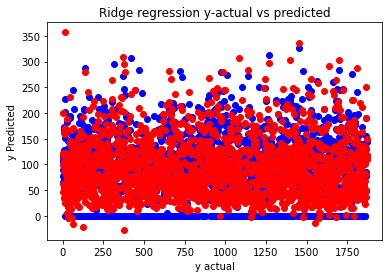

In [24]:
model_cv=RidgeCV(alphas=np.arange(.1,1,0.01),cv=5,scoring='r2')
model_cv.fit(X_train,y_train)
print("Best Alpha",model_cv.alpha_)
y_pred=model_cv.predict(X_test)
x=r2_score(y_test,y_pred)
print("Ridge Regression R2:",x)
print("Ridge Regression: Adjusted R^2 score is", adjusted_r2_score(x,X_train.shape[0], X_train.shape[1]-1))
plot = plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plot.axes.set_xlabel('y actual')
plot.axes.set_ylabel('y Predicted')
plt.title('Ridge regression y-actual vs predicted')
plt.show()

<h3>Lasso Regression</h3>

11.356762400817225
Lasso Regression R2: 0.721164987334329
Lasso Regression: Adjusted R^2 score is 0.7208367706260013


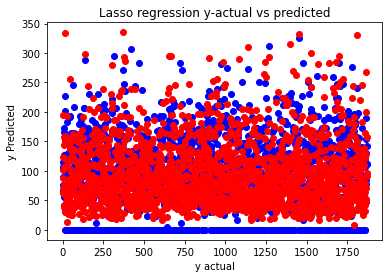

In [25]:
from sklearn.linear_model import LassoCV
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
model_l_cv.fit(X_train, y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, y_train)
Y_Pred=lasso_best.predict(X_test)
x=r2_score(y_test, Y_Pred)
print("Lasso Regression R2:",x)
print("Lasso Regression: Adjusted R^2 score is", adjusted_r2_score(x,X_train.shape[0], X_train.shape[1]-1))
plot = plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(Y_Pred)), Y_Pred, color='red')
plot.axes.set_xlabel('y actual')
plot.axes.set_ylabel('y Predicted')
plt.title('Lasso regression y-actual vs predicted')
plt.show()

<h3> Quadratic Regression</h3>

Quadratic Regression R2: 0.890180015402414
Quadratic Regression: Adjusted R^2 score is 0.8900507462926683


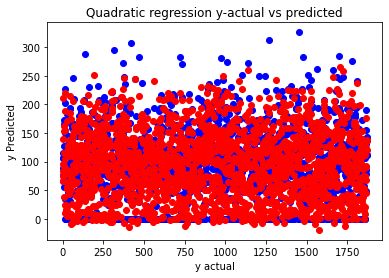

In [26]:
quadratic=PolynomialFeatures(degree=2)
quadratic_features=quadratic.fit_transform(X_train)
quadratic.fit(quadratic_features,y_train)
quad_model=LinearRegression()
quad_model.fit(quadratic_features,y_train)
predict_quad=quad_model.predict(quadratic.fit_transform(X_test))
x=r2_score(y_test, predict_quad)
print("Quadratic Regression R2:",x)
print("Quadratic Regression: Adjusted R^2 score is", adjusted_r2_score(x,X_train.shape[0], X_train.shape[1]-1))
plot = plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(predict_quad)), predict_quad, color='red')
plot.axes.set_xlabel('y actual')
plot.axes.set_ylabel('y Predicted')
plt.title('Quadratic regression y-actual vs predicted')
plt.show()

<h3>Symbolic Regression</h3>

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.70      2.18376e+27        7          41.7635          41.1596      1.04m
   1     7.59      6.32376e+09       11          38.1302          38.0269     39.07s
   2     7.38      4.63664e+12       11          38.0102          39.1056     33.47s
   3     9.41      1.81341e+10       21          30.5686          31.0124     29.79s
   4    11.64       4.1946e+09       21          30.3066          29.2208     27.49s
   5    14.74      4.26586e+09       29          27.5772          27.1784     23.13s
   6    17.54      5.70432e+06       29          26.1931          28.7916     18.64s
   7    22.13           672678       33          25.0715           25.543     12.41s
   8    27.80      9.51668e+06       31          23.5624          22.9846  

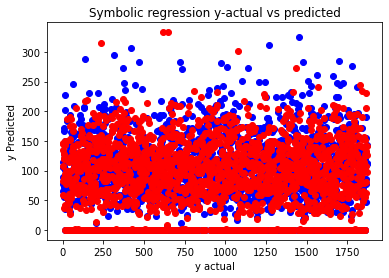

In [27]:
symbolic = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
symbolic.fit(X_train, y_train)
score_gp = symbolic.score(X_train, y_train)
print(score_gp)
Y_Pred=symbolic.predict(X_test)
x=r2_score(y_test, Y_Pred)
print("Symbolic Regression R2:",x)
print("Symbolic Regression: Adjusted R^2 score is", adjusted_r2_score(x,X_train.shape[0], X_train.shape[1]-1))
plot = plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(Y_Pred)), Y_Pred, color='red')
plot.axes.set_xlabel('y actual')
plot.axes.set_ylabel('y Predicted')
plt.title('Symbolic regression y-actual vs predicted')
plt.show()